In [19]:
# Auto reload so I don't need to restart the kernel each time
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
## Import data
FILE = '../data/put-titanic-homework.csv'
columns_to_omit = [
    'Name']  # Omit name for simplicity, we assume it doesn't affect the chances of survival (it musn't be the case! Our assumption)
input_df = pd.read_csv(FILE, usecols=lambda column: column not in columns_to_omit)

In [21]:
#quick look at our data types & null counts 
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  100 non-null    int64 
 1   Pclass       100 non-null    int64 
 2   Sex          100 non-null    object
 3   Age          100 non-null    int64 
 4   SibSp        100 non-null    int64 
 5   Parch        100 non-null    int64 
 6   Survived     100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [22]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
input_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Survived
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2.390000,29.990000,0.730000,0.440000,0.400000
std,29.011492,0.815197,17.166737,1.179411,0.967346,0.492366
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,25.750000,2.000000,19.000000,0.000000,0.000000,0.000000
50%,50.500000,3.000000,27.500000,0.000000,0.000000,0.000000
75%,75.250000,3.000000,38.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,78.000000,5.000000,5.000000,1.000000


In [23]:
#quick way to separate numeric columns
input_df.describe().columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Survived'], dtype='object')

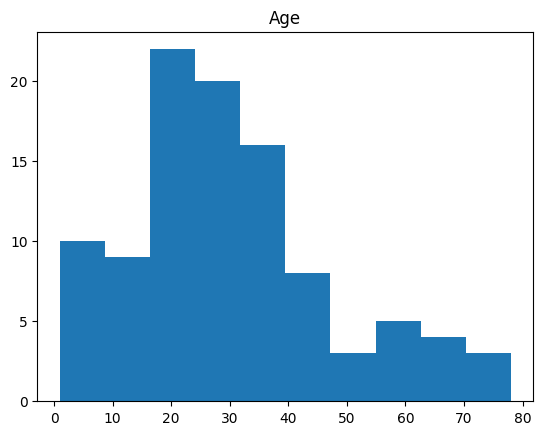

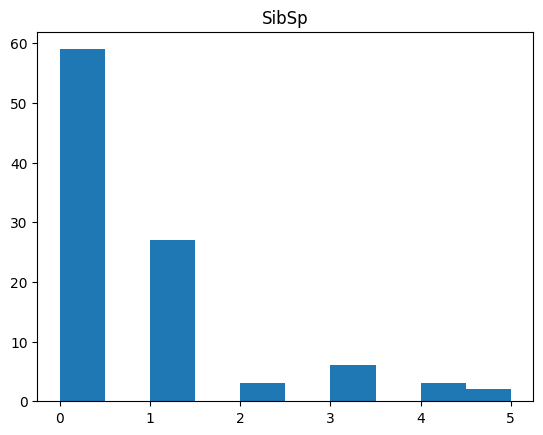

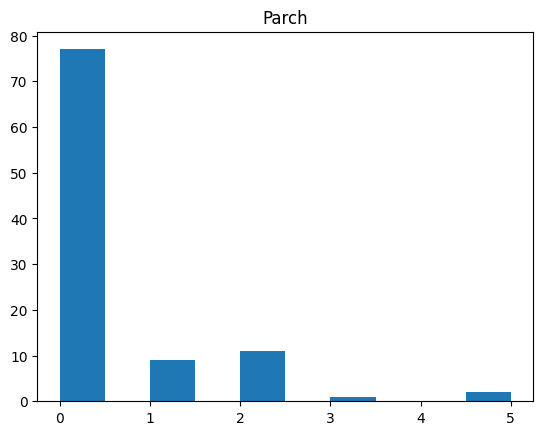

In [24]:
#distributions for all numeric variables 
df_num = input_df[['Age','SibSp','Parch']]
df_cat = input_df[['Survived','Pclass','Sex']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch
Age    1.000000 -0.334895 -0.246081
SibSp -0.334895  1.000000  0.432762
Parch -0.246081  0.432762  1.000000


,Age,SibSp
Survived,,
0,30.65,0.85
1,29.00,0.55


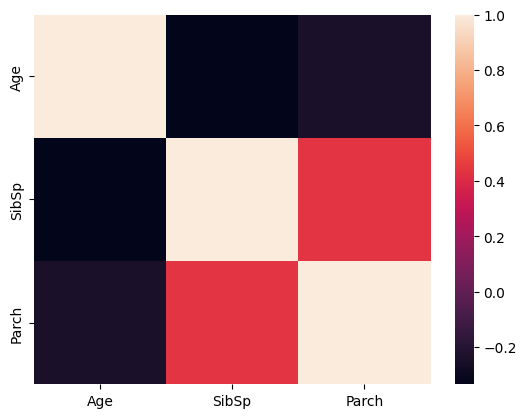

In [28]:
# take the non-normal distributions and consider normalizing them
print(df_num.corr())
sns.heatmap(df_num.corr())
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(input_df, index = 'Survived', values = ['Age','SibSp'])